In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, Point

data_dir = "./dataset/"
img_dir = "./img/"

# Funzioni utili

In [2]:
# Funzione che modifica i nomi delle colonne di "da_modificare" con i nomi delle corrispondenti colonne di "base"
def make_consistent(base, da_modificare):
    for i in range(min(base.columns.size, da_modificare.columns.size)):
        # check if columns name are equal
        if(base.columns[i] != da_modificare.columns[i]):
            # rename column
            da_modificare.rename(columns = {da_modificare.columns[i]:base.columns[i]}, inplace=True)

# Funzione che verifica che due dataset abbiano lo stesso numero di colonne e con gli stessi nomi 
def check_same_shape(a, b):
    size = min(a.columns.size, b.columns.size)
    return np.all(a.columns[:size] == b.columns[:size])

# restituisce una serie di sigle delle province della regione 
def get_province(df_province, regione):
    return df_province[df_province.regione == regione].sigla

# restituisce
def get_scuole(province, df_scuole):
    return df_scuole[df_scuole.SIGLAPROVINCIA.isin(province)]

# Import DataSet

In [5]:
# ***************************** #
# ********* ELENCO ************ # 
# ***************************** #

elenco = pd.read_csv(data_dir + "elenco_scuole_italia.csv")

# ***************************** #
# ********* PROVINCE ********** # 
# ***************************** #


province = pd.read_csv(data_dir + "province.csv", encoding='latin-1')
regioni = province.regione.unique()

# ***************************** #
# ********** AMBIENTE ********* # 
# ***************************** #

a_i_1718 = pd.read_csv(data_dir + "ambiente_italia_1718.csv")
a_i_1819 = pd.read_csv(data_dir + "ambiente_italia_1819.csv")
a_i_2021 = pd.read_csv(data_dir + "ambiente_italia_2021.csv")
a_i_2122 = pd.read_csv(data_dir + "ambiente_italia_2122.csv")

# MODIFICHE
# drop last column in ambiente dataframes ( sembra poco rilevante )
a_i_1718.drop(columns=['AREAALTREMOTIVAZIONI'], inplace=True)
a_i_1819.drop(columns=['AREAALTREMOTIVAZIONI'])
a_i_2021.drop(columns=['ALTRECRITICITASPECIFICHE'], inplace=True)
a_i_2122.drop(columns=['ALTRECRITICITASPECIFICHE'], inplace=True)
# drop column in position 12 ( non coincidono tra annate e sempra poco rilevante )
a_i_1718.drop(columns=[a_i_1718.columns[12]], inplace=True)
a_i_1819.drop(columns=[a_i_1819.columns[12]], inplace=True)
a_i_2021.drop(columns=[a_i_2021.columns[12]], inplace=True)
a_i_2122.drop(columns=[a_i_2122.columns[12]], inplace=True)

# modifica nomi degli attributi 
make_consistent(a_i_2021, a_i_1819)
make_consistent(a_i_2021, a_i_1718)

# ***************************** #
# ****** RAGGIUNGIBILITÀ ****** # 
# ***************************** #
t_i_1516 = pd.read_csv(data_dir + "trasporti_italia_1516.csv")
t_i_1718 = pd.read_csv(data_dir + "trasporti_italia_1718.csv")
t_i_1819 = pd.read_csv(data_dir + "trasporti_italia_1819.csv")
t_i_2021 = pd.read_csv(data_dir + "trasporti_italia_2021.csv")
t_i_2122 = pd.read_csv(data_dir + "trasporti_italia_2122.csv")

# MODIFICHE
# drop last column ( "ALTRO", difficile da analizzare)
t_i_1516.drop(columns=[t_i_1516.columns[t_i_1516.columns.size - 1]], inplace=True)
t_i_1718.drop(columns=[t_i_1718.columns[t_i_1718.columns.size - 1]], inplace=True)
t_i_1819.drop(columns=[t_i_1819.columns[t_i_1819.columns.size - 1]], inplace=True)
t_i_2021.drop(columns=[t_i_2021.columns[t_i_2021.columns.size - 1]], inplace=True)
t_i_2122.drop(columns=[t_i_2122.columns[t_i_2122.columns.size - 1]], inplace=True)
# le annate 2121 e 2122 hanno in più una colonna alla fine relativa alla presenza di piste ciclabili

# modifica nomi degli attributi 
make_consistent(t_i_2021, t_i_1516)
make_consistent(t_i_2021, t_i_1718)
make_consistent(t_i_2021, t_i_1819)

# ***************************** #
# * BARRIERE ARCHITETTONICHE ** # 
# ***************************** #
ba_i_1718 = pd.read_csv(data_dir + "barriere_architettoniche_italia_1718.csv")
ba_i_1819 = pd.read_csv(data_dir + "barriere_architettoniche_italia_1819.csv")
ba_i_2021 = pd.read_csv(data_dir + "barriere_architettoniche_italia_2021.csv")
ba_i_2122 = pd.read_csv(data_dir + "barriere_architettoniche_italia_2122.csv")

# MODIFICHE
# drop last column ( "ALTRO", difficile da analizzare)
ba_i_1718.drop(columns=[ba_i_1718.columns[ba_i_1718.columns.size - 1]], inplace=True)
ba_i_1819.drop(columns=[ba_i_1819.columns[ba_i_1819.columns.size - 1]], inplace=True)
ba_i_2021.drop(columns=[ba_i_2021.columns[ba_i_2021.columns.size - 1]], inplace=True)
ba_i_2122.drop(columns=[ba_i_2122.columns[ba_i_2122.columns.size - 1]], inplace=True)

# modifica nomi degli attributi 
make_consistent(ba_i_2021, ba_i_1819)
make_consistent(ba_i_2021, ba_i_1718)

print('SCHEMA DATASET AMBIENTE', a_i_1819.columns)
print("\n\n\n")
print('SCHEMA DATASET RAGGIUNGIBILITÀ', t_i_1819.columns)
print("\n\n\n")
print('SCHEMA DATASET BARRIERE ARCHITETTONICHE', ba_i_1819.columns)
print("\n\n\n")
print('SCHEMA ELENCO SCUOLE', elenco.columns)
print("\n\n\n")
print('SCHEMA province', province.columns)

SCHEMA DATASET AMBIENTE Index(['ANNOSCOLASTICO', 'CODICESCUOLA', 'CODICEEDIFICIO',
       'CONTESTOSENZADISTURBI', 'VICINANZADISCARICA',
       'VICINANZAINDUSTRIEINQUINANTI', 'VICINANZAACQUEINQUINANTI',
       'VICINANZAFONTIINQUINAMENTOATMOSFERICO',
       'VICINANZAFONTIINQUINAMENTOACUSTICO',
       'VICINANZASORGENTIRADIAZIONIELETTROMAGNETICHE', 'VICINANZACIMITERI',
       'VICINANZAALTRIDISTURBI', 'ASSENZAPIAZZOLAADEGUATA', 'AREANONRECINTATA',
       'PRESENZAGRANDETRAFFICO', 'PRESENZATRANSITOFERROVIARIO',
       'PREESISTENZEINDUSTRIALIABBANDONATE', 'ZONAURBANADEGRADATA',
       'VICINANZAINDUSTRIEARISCHIO', 'AREAALTREMOTIVAZIONI'],
      dtype='object')




SCHEMA DATASET RAGGIUNGIBILITÀ Index(['ANNOSCOLASTICO', 'CODICESCUOLA', 'CODICEEDIFICIO', 'SCUOLABUS',
       'TRASPORTIPUBBLICIURBANI', 'TRASPORTIPUBBLICIINTERURBANI',
       'TRASPORTIFERROVIARI', 'MEZZIPRIVATI', 'TRASPORTODISABILI'],
      dtype='object')




SCHEMA DATASET BARRIERE ARCHITETTONICHE Index(['ANNOSCOLASTICO',

### Elenchi tipo scuole

In [6]:
licei = ['PC', 'PL', 'PS', 'SL']
istituti_tecnici = ['TA', 'TB', 'TD', 'TE', 'TF', 'TH', 'TL', 'TN']
istituti_professionali = ['RA', 'RB', 'RC', 'RE', 'RF', 'RH', 'RI', 'RM', 'RN', 'RS', 'RT', 'RV']
area_artistica = ['SD', 'SM', 'SN', 'SR', 'ST']
media = ['MM']
elementari = ['EE']
istituto_comprensivo = ['IC']
superiori = ['IS']
scuola_materna = ['AA']
magistrali = ['PM', 'PQ']
altri = ['VC', 'VE']

regioni

array(['Sicilia', 'Piemonte', 'Marche', "Valle d'Aosta", 'Toscana',
       'Campania', 'Puglia', 'Veneto', 'Lombardia', 'Emilia-Romagna',
       'Trentino-Alto Adige', 'Sardegna', 'Molise', 'Calabria', 'Abruzzo',
       'Lazio', 'Liguria', 'Friuli-Venezia Giulia', 'Basilicata',
       'Umbria'], dtype=object)

In [7]:
province_lombardia = get_province(province, 'Puglia')
cs_lombardia = get_scuole(province_lombardia, elenco).CODICESCUOLA
cs_lombardia = cs_lombardia.to_numpy()


licei_lombardia = [x for x in cs_lombardia if x[2:4] in licei]

servizi_igienici = ba_i_2122[ba_i_2122.CODICESCUOLA.isin(licei_lombardia)].SERVIZIIGIENICISPECIFICINORMADISABILI == 'SI'
servizi_igienici[servizi_igienici].size / len(licei_lombardia) * 100

53.95348837209303

# GeoPandas

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

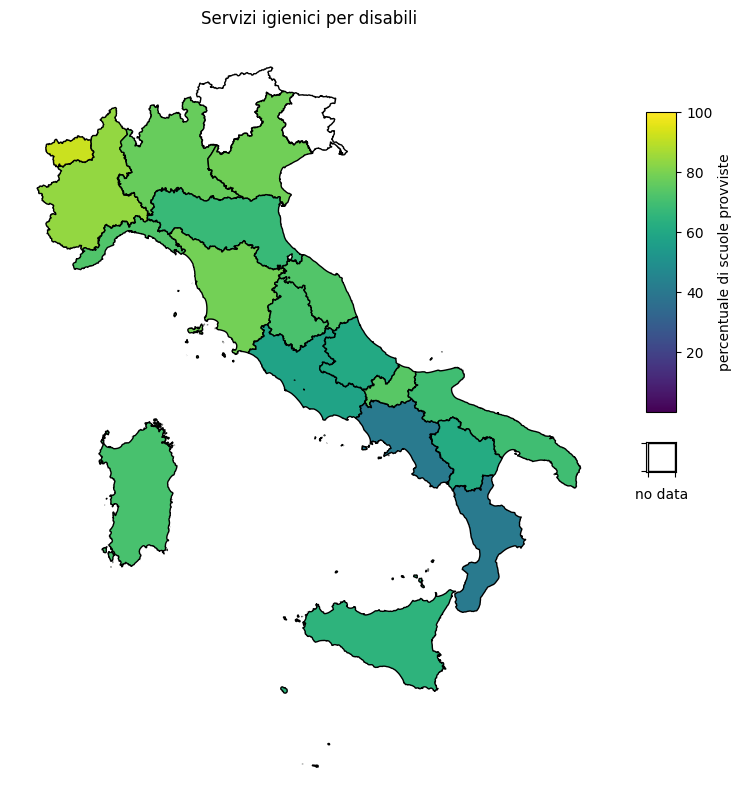

In [9]:
regioni = gpd.read_file(filename=(data_dir + 'regioni_shape/regioni.shp'))

def percentuale_servizi_igienici_disabili(regione):
    prov = province[province.regione == regione].sigla
    scuole = elenco[elenco.SIGLAPROVINCIA.isin(prov)].CODICESCUOLA
    if(len(scuole) == 0): return 0
    servizi_igienici = ba_i_2122[ba_i_2122.CODICESCUOLA.isin(scuole)].SERVIZIIGIENICISPECIFICINORMADISABILI
    servizi_igienici = servizi_igienici == 'SI'
    return servizi_igienici[servizi_igienici].size / len(scuole) * 100

#regioni['SERVIZI_IGIENICI'] = percentuale_servizi_igienici_disabili('Lombardia')

regioni['SERVIZI_IGIENICI'] = regioni.DEN_REG.apply(lambda x: percentuale_servizi_igienici_disabili(x))

fig, ax = plt.subplots(1, figsize=(10, 10))
plt.title('Servizi igienici per disabili')
ax.set_axis_off()

cax = fig.add_axes([0.85, 0.5, 0.03, 0.3])
cmap = plt.cm.viridis
cmap.set_under('white')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0.1, vmax=100))
cb = fig.colorbar(sm, cax=cax)
cb.set_label('percentuale di scuole provviste')

wax = fig.add_axes([0.85, 0.44, 0.03, 0.03])
wax.fill([0, 1, 1, 0], [0, 0, 1, 1], facecolor='white', edgecolor='black')
wax.set_xlabel('no data')
wax.set_yticklabels([])
wax.set_xticklabels([])

regioni.plot(column='SERVIZI_IGIENICI', vmin=0.1, vmax=100, cmap=cmap, ax=ax, edgecolor='black', linewidth=1)
plt.savefig(img_dir + 'cartina_servizi_igienici.png')
# regioni.plot(edgecolor='white', linewidth=1, figsize=(10, 10))
# italy.plot(edgecolor='black', linewidth=1)

### Le scuole nella città

La ricerca ha l'obiettivo di analizzare le scuole dal punto di vista dell'inserimento nelle città; ovvero come essere dialogano con l'infrastruttura di trasporto e con l'ambiente circostante.
Le analisi si articolano attraverso i seguenti temi:
- la raggiungibilità delle scuole mediante i mezzi di trasporto pubblici disponibili nella città. 
- l'ambiente in cui si trova la scuola, ovvero la vicinanza della scuola a fonti inquinanti, cimiteri, discariche;
questo tema può anche diventare occasione di discutere la qualità e la distribuzione degli agenti inquinanti da un punto di vista pratico, ovvero legato ai luoghi che frequentiamo quotidianamente, piuttosto che da un punto di vista puramente scientifico.
- il superamento delle barriere architettoniche, ovvero la presenza di accorgimenti strutturali che consentono anche a persone con disabilità di fruire in modo completo dell'edificio e dei suoi servizi;
quest'ultimo punto consente di completare il tema della raggiungibilità, e quindi determinare le effettive possibilità di fruire della scuola.

La ricerca porterà le diverse regioni e provincie italiane a confronto, con lo scopo di evidenziare le zone di maggior criticità.

Prima sezione:
Raggiungibilità:
Potremmo partire con un istogramma che per ogni mezzo di trasporto dice la percentuale di scuole raggiungibili con quel mezzo in tutta italia, in modo da capire qual è il mezzo principale con cui è possibile raggiungere le scuole.
Poi per ogni mezzo potremmo fare una cartina divisa in regioni per cui si dice in ogni regione la percentuale di scuole raggiungibili con quel mezzo; in questo modo vediamo come sono distribuiti i mezzi (per esempio, noteremmo che probabilmente la metro è distribuita in regioni con più città metropolitane, mentre i bus sono distribuiti in modo più o meno equo in tutta italia
Dopo queste cartine si potrebbe fare una cartina che fotografa la situazione generale delle regioni; quindi per esempio per ogni regione calcoliamo la percentuale di scuole raggiungibili con almeno un mezzo; in questo modo troviamo le regioni messe meglio e quelle messe peggio; potremmo analizzare nel dettaglio la regione messa peggio, andando a fare lo stesso lavoro fatto fino ad ora per tutta italia ma per quella regione divisa in province, in modo da identificare nello specifico la provincia con più problematiche (se ci sono poche province potremmo addirittura andare a fare un discorso comunale ma diventa un po' un casino)

Potremmo usare lo stesso schema più o meno anche per gli altri due ambiti.

La divisione in tre ambiti è comoda perchè possiamo dividerci in tre la presentazione, e ogni sezione dovrebbe portare via 5 minuti circa, più 5 minuti di introduzione e conclusione, come abbiamo trovato i dati, problematica dei dati corretti ecc. dovremmo arrivare tranquillamente a 20 minuti.


AMBIENTE

Per ogni sezione possiamo fare una mini introduzione e poi commentare uno ad uno i grafici e le cartine.

I seguenti punti sono rilevanti per determinare la vivibilità dell'ambiente in cui è inserita la scuola; oltre al tema della salute, legata principalmente agli agenti inquinanti, gli elementi di disturbo come traffico, transiti ferroviari e in generali fonti di inquinamento acustico possono essere determinanti per l'effettiva vivibilità dell'ambiente durante le lezioni e durante i momenti di svago.
- contesto senza disturbi (?) -> possiamo metterlo e discutere se sia una cosa sensata / rilevante
- vicinanza discarica
- vicinanza industrie inquinanti
- vicinanza acque inquinate
- vicinanza fonti inquinamento atmosferico
- vicinanza fonti di inquinamento acustico
- vicinanza fonti di radiazioni elettro magnetiche
- vicinanza discariche
- vicinanza cimiteri
- presenza grande traffico 
- presenza transito ferroviario

Grafici:
istogramma in cui per ogni categoria si dicono le percentuali di scuole che sono vicini a quella cosa, in modo da individuare l'elemento negativo più presente vicino alle scuole
Poi cartina delle regioni in cui per ogni elemento mettiamo la percentuale di scuole, così da vedere per esempio in che zona dell'italia sono maggiormente presenti industrie inquinanti vicino alle scuole;
Poi facciamo la cartina regionale in cui per ogni regione vediamo la percentuale media di vicinanze, cioè per ogni scuola il numero di cose a cui è vicina, facciamo la media e quindi infine abbiamo per ogni regione un indice di qualità dell'ambiente; scegliamo quella peggiore e rifacciamo il discorso a livello di province.

BARRIERE ARCHITETTONICHE

categorie:
- Accorgimenti presenti in generale ( i dati successivi sono presenti solo se questa è a si )
- accesso esterno con rampe
- Scale a norma
- Ascensore per il trasporto disabili
- Servoscala piattaforma elevatrice
- servizi igienici per disabili
- porta larghezza minima
- Percorsi interni per disabili
- Percorsi esterni per disabili

Qui userei uno schema un po' diverso
Farei una cartina generale in cui mettiamo la percentuale di scuole che hanno

Problematicità: come trattiamo i non definiti? li includiamo nel totale? io li includerei come no; è vero che bisognerebbe dare il beneficio del dubbio, ma volendo dichiarare quante scuole, secondo i dati, presentano questi servizi, il non definito mi pare più un no che un si; il motivo per cui è non definitvo è una problematica relativa alla raccolta dei dati.
Quindi le percentuali le farei SI / SI + NO + NON DEFINITO
Comunque durante la presentazione dovremmo far presente di questa cosa e giustificare la scelta fatta
